In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt

C:\Users\keert\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
basedir = 'dataset'
kitti_data = KITTIdata(basedir, sequences = ['00','01'], img_size=(150,50))

completed load sequence 00 data
completed load sequence 01 data


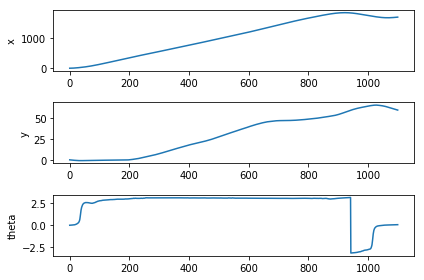

In [4]:
plt.figure()
ylabels = ['x','y','theta']
for i in range(3):
    plt.subplot(3,1, i+1)
    plt.plot(kitti_data.poses['01'][:,i])
    plt.ylabel(ylabels[i])
plt.tight_layout()

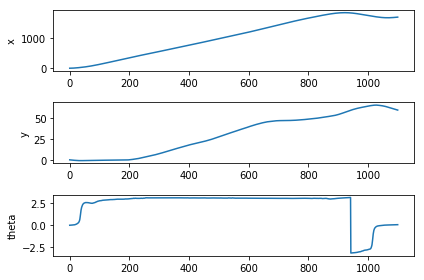

In [5]:
plt.figure()
ylabels = ['x','y','theta']
for i in range(3):
    plt.subplot(3,1, i+1)
    plt.plot(kitti_data.poses['01'][:,i])
    plt.ylabel(ylabels[i])
plt.tight_layout()

In [6]:
inputs, velocities = kitti_data.load_data_input_model()

In [8]:
np.random.seed(100)
mask = np.arange(inputs.shape[0])
np.random.shuffle(mask)
inputs = inputs[mask]
velocities = velocities[mask]
num_validation = int(inputs.shape[0]/15)
num_training = inputs.shape[0] - num_validation

X_train, y_train = inputs[:num_training], velocities[:num_training]
X_val, y_val = inputs[num_training:], velocities[num_training:]

mean_image = np.mean(X_train, axis = 0)
std_image = np.std(X_train, axis = 0)

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_train /= 255
X_val /= 255


X_train = X_train - 0.5#mean_image.astype(np.float32)
X_val = X_val - 0.5#mean_image.astype(np.float32)

X_train /=0.5
X_val /=0.5

mean_y = np.mean(y_train, axis = 0)
std_y = np.std(y_train, axis = 0)

y_train = y_train - mean_y
y_val = y_val - mean_y

y_train /= std_y
y_val /=std_y

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(5264, 50, 150, 6)
(5264, 2)
(376, 50, 150, 6)
(376, 2)


In [9]:
from deep_visual_odometry.input_model import training
tf.reset_default_graph()
training(X_train, y_train, X_val, y_val, 
         conv_featmap=[16,16,16,16],
         fc_units=[128,128],
         conv_kernel_size=[7,5,5,5],
         pooling_size=[2,2,2,2],
         l2_norm=0.01,
         seed=235,
         learning_rate=1e-4,
         epoch=20,
         batch_size=100,
         verbose=False,
         pre_trained_model=None)

Building velocity CNN. Parameters: 
conv_featmap=[16, 16, 16, 16]
fc_units=[128, 128]
conv_kernel_size=[7, 5, 5, 5]
pooling_size=[2, 2, 2, 2]
l2_norm=0.01
seed=235
learning_rate=0.0001
number of batches for training: 52
epoch 1 
Best validation mse! iteration:1 val_mse: 0.5102434158325195
Best validation mse! iteration:2 val_mse: 0.5036841034889221
Best validation mse! iteration:3 val_mse: 0.502482533454895
epoch 2 


KeyboardInterrupt: 

In [ ]:
from deep_visual_odometry.input_model import test_input_model
out = test_input_model("CNN_Velocity_Model",X_val,y_val)

In [ ]:
error = out-y_val
print(f'recalculated validation mse is {np.linalg.norm(error)/num_validation}')
print(f'validation mse if the rotational part is ignored {np.linalg.norm(error[:,0])/num_validation}')
      

In [ ]:
out = test_input_model("CNN_Velocity_Model",X_val,y_val)

In [ ]:
plt.scatter(y_val[:,0],out[:,0])
plt.show()

In [ ]:
plt.scatter(y_val[:,1],out[:,1])
plt.show()

In [ ]:
out[:,1]